<a href="https://colab.research.google.com/github/dsanmartin/ELE050-B/blob/main/03_trees_ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor, XGBClassifier
import matplotlib.pyplot as plt

# Regresión

## Datos
- Diabetes: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

In [2]:
diabetes = load_diabetes(as_frame=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

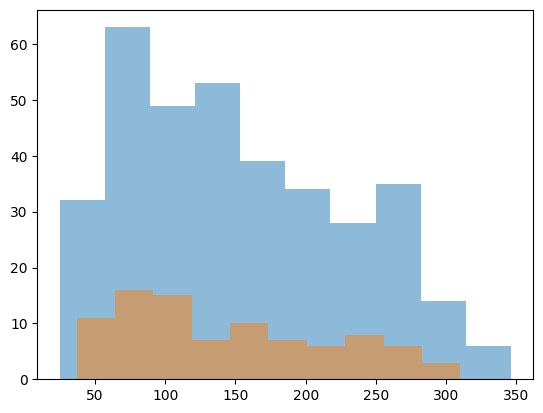

In [4]:
plt.hist(y_train, alpha=.5)
plt.hist(y_test, alpha=.5)
plt.show()

In [5]:
lr = LinearRegression()
lr = lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)
print("MSE", mean_squared_error(y_test, y_lr_pred))
print("R2", r2_score(y_test, y_lr_pred))

MSE 2900.1936284934814
R2 0.4526027629719195


In [6]:
dt = DecisionTreeRegressor()
dt = dt.fit(X_train, y_train)
y_dt_pred = dt.predict(X_test)
print("MSE", mean_squared_error(y_test, y_dt_pred))
print("R2", r2_score(y_test, y_dt_pred))

MSE 4702.76404494382
R2 0.11237649124328697


In [7]:
rf = RandomForestRegressor(n_estimators=10)
rf = rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)
print("MSE", mean_squared_error(y_test, y_rf_pred))
print("R2", r2_score(y_test, y_rf_pred))

MSE 3491.1944943820226
R2 0.34105426569567365


In [8]:
xgb = XGBRegressor(n_estimators=5, max_depth=3)
xgb = xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)
print("MSE", mean_squared_error(y_test, y_xgb_pred))
print("R2", r2_score(y_test, y_xgb_pred))

MSE 2967.297239927608
R2 0.4399372874213343


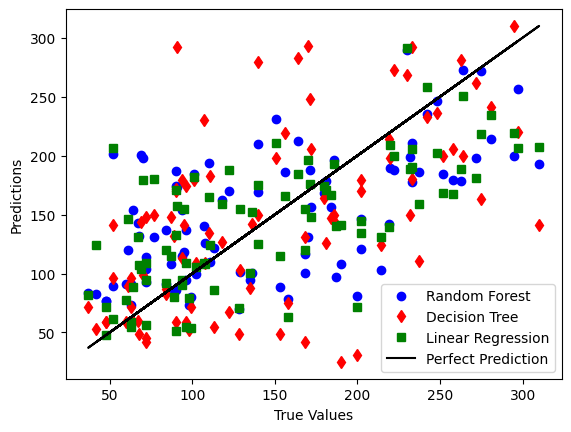

In [9]:
plt.plot(y_test, y_rf_pred, 'bo', label='Random Forest')
plt.plot(y_test, y_dt_pred, 'rd', label='Decision Tree')
plt.plot(y_test, y_lr_pred, 'gs', label='Linear Regression')
plt.plot(y_test, y_test, 'k-', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

In [10]:
metrics = {
    'Regresión Lineal': {
        'MSE': mean_squared_error(y_test, y_lr_pred),
        'R2': r2_score(y_test, y_lr_pred)
    },
    'Árbol de Decisión': {
        'MSE': mean_squared_error(y_test, y_dt_pred),
        'R2': r2_score(y_test, y_dt_pred)
    },
    'Random Forest': {
        'MSE': mean_squared_error(y_test, y_rf_pred),
        'R2': r2_score(y_test, y_rf_pred)
    },
    'XGBoost': {
        'MSE': mean_squared_error(y_test, y_xgb_pred),
        'R2': r2_score(y_test, y_xgb_pred)
    }
}
metrics_df = pd.DataFrame(metrics).T
metrics_df

,MSE,R2
Regresión Lineal,2900.193628,0.452603
Árbol de Decisión,4702.764045,0.112376
Random Forest,3491.194494,0.341054
XGBoost,2967.297240,0.439937


# Clasificación

## Datos

Cáncer de mamas: https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset

In [11]:
cancer = load_breast_cancer(as_frame=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

In [13]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)
print(classification_report(y_test, y_lr_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [15]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_dt_pred = dt.predict(X_test)
print(classification_report(y_test, y_dt_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [16]:
rf = RandomForestClassifier(n_estimators=10)
rf = rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.99      0.94      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [17]:
xgb = XGBClassifier(n_estimators=5, max_depth=3)
xgb = xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)
print(classification_report(y_test, y_xgb_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

